In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Tensorflow version 출력
print(tf.__version__)

2.10.0


> 일반적으로 딥러닝 기술은 '데이터 준비 -> 딥러닝 네트워크 설계 -> 학습 -> 테스트(평가)'의 순서로 이루어진다.

## 1. 데이터 준비

+ MINIST 숫자 손글씨 Dataset 불러오기

In [3]:
mnist = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

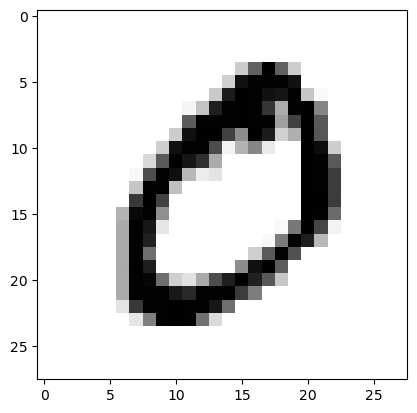

0


In [4]:
# 데이터 출력해보기
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.show()

# 대응하는 y값
print(y_train[1])

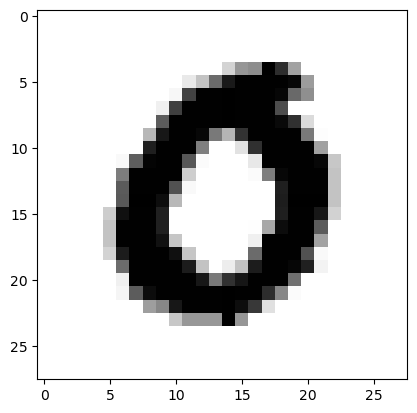

8000 번째 이미지의 숫자는 0입니다.
(60000, 28, 28)
(60000,)


In [5]:
idx = 8000
plt.imshow(X_train[idx], cmap=plt.cm.binary)
plt.show()

print(f'{idx} 번째 이미지의 숫자는 {y_train[idx]}입니다.')
print(X_train.shape)
print(y_train.shape)

### 데이터 전처리하기

+ 인공지능 모델을 훈련시킬 때, 값이 너무 커지는 것을 방지하기 위해 0-1 사이의 값으로 정규화 시켜주는 것이 좋다
+ 정규화는 모든 값을 최댓값으로 나누어주면 된다.

In [6]:
print(f'최소값: {np.min(X_train)}, 최대값: {np.max(X_train)}')

X_tr_norm, X_te_norm = X_train / 255, X_test / 255

print(f'최소값: {np.min(X_tr_norm)}, 최대값: {np.max(X_tr_norm)}')

최소값: 0, 최대값: 255
최소값: 0.0, 최대값: 1.0


## 2. 딥러닝 네트워크 설계하기

+ Sequential Model 사용해보기

In [1]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print(f'모델에 추가된 Layer 개수: {len(model.layers)}')

model.summary()

NameError: name 'keras' is not defined